<a href="https://colab.research.google.com/github/SadeenAlsabbagh/Computational_Physics/blob/main/SadeenAlsabbagh_Homework_Euler_Residuals_and_Improved_Euler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


The code that appears in this notework is the exact same (or very close to) what we did in class, mostly for upward motion.  Look for the prompts in **bold** to find the necessary modifications to upward motion.  

At the end of the notebook, you'll find the Improved Euler Integration method.

# Set all constants here

In [ ]:
g=9.81
m=1.0
c=0.2
vT=np.sqrt(m*g/c)

# 1D Motion with Quadratic Drag: Plotting Analytical Solutions

**Modify the code below to include only *downward* motion.**

In [ ]:
def v_down(time,g,vT):
  return -vT*np.tanh(g*time/vT)

def v_up(time,vT,v0):
  return vT*np.tan(np.arctan(v0/vT)-time*9.81/vT)

v0=5.0
h=0.05 # Timestep
peakTime=(vT/g)*np.arctan(v0/vT)
print("Peak Time: ",peakTime)

finalTime=peakTime

def analytical(v0,finalTime,h):

  peakTime=(vT/g)*np.arctan(v0/vT)
  #print("Time of Peak:", peakTime, " seconds.")

  v=np.array([v0]) # Starting velocity
  time=np.array([0]) # Start at t=0

  while time[-1]<peakTime:
    time=np.append(time,[time[-1]+h])
    v=np.append(v,[v_up(time[-1],vT,v0)])

  #print("h: ",h," t before tPeak: ",time[-1])

  while time[-1]<finalTime:
    time=np.append(time,[time[-1]+h])
    v=np.append(v,[v_down(time[-1]-peakTime,g, vT)])


  return time,v


time,va=analytical(v0,finalTime,h)

Peak Time:  0.4426373052430577


# Numerical Integration in 1D

We will start with the one-dimensional projectile problem.  The advantage of beginning here is that we know the answers, so we can verify that our code is working properly before going on to the 2D case.

### Euler's Method

The simplest approach to numerical integration is called Euler's method. We simply take the equation $v=v_o+a t$ from kinematics, and be sure to take a small enough step in time that $a$ can be considered to be constant (or at least that a will vary very little).  In calculus, we can conceptualize an infinitely small timestep, $dt$, but in computational physics, we must make do with a small but finite step size, $h$.  Thus, at each step we can calculate the acceleration using the velocity of the previous step:

\begin{eqnarray}
v_{i+1}=v_i + a(v_i)h.
\end{eqnarray}




**Change the code so that we are only considering the downward part of the object's motion, and rerun the numerical integration.**

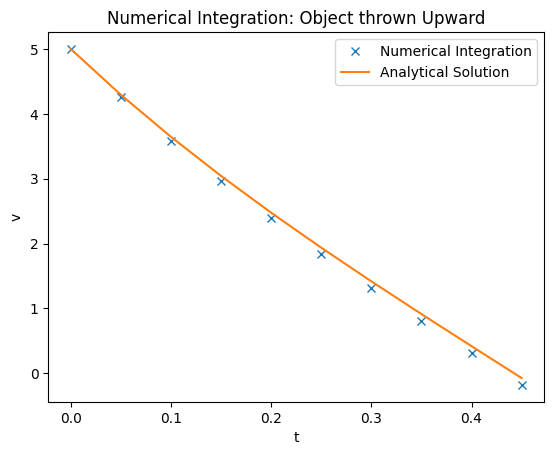

In [ ]:
# A function to calclulate the acceleration due to gravity and drag at any v.
def accel(v):
  # If v is positive (upward motion) drag is negative, and vice versa.
  return -9.81-np.sign(v) * (c/m)*np.square(v)


def numerical(time,v0):

# time=np.linspace(t0,tf,N) #(Just reuse old time)
  h=time[1]-time[0] # Stepsize

  v=np.zeros_like(time)

  v[0]=v0 # at t=0, let v=v0


  # Numerical Integration
  for i in range(1,time.size):
    v[i]=v[i-1]+accel(v[i-1])*h

  return v


v=numerical(time,v0)

plt.subplot()
plt.plot(time, v,'x',label='Numerical Integration')
plt.plot(time, va,label='Analytical Solution')
plt.title('Numerical Integration: Object thrown Upward')
plt.ylabel('v')
plt.xlabel('t')
plt.legend()
plt.show()


The residuals are the difference between the numerical integration and the "right" answer (which we can find in this case, the analytical solution). You can see that each step of the integration introduces more and more error.


**For *downward motion,* try out a range of h values, and make a plot of the absolute value of the residual of the final point of the numerical integration vs h.**

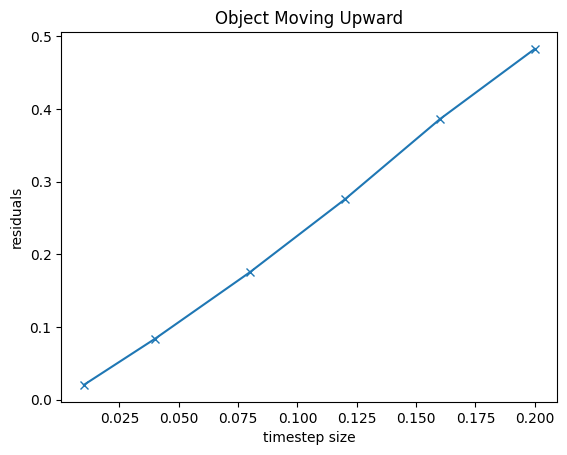

In [ ]:
h=np.array([.01,.04,0.08,0.12,0.16,0.2])
peakTime=(vT/g)*np.arctan(v0/vT)
finalTime=peakTime

residualArray=np.array([0.])
for step in h:
 time,va=analytical(v0,finalTime,step)
 v=numerical(time,v0)
 residual= v[-1]-va[-1]
 residualArray=np.append(residualArray,np.array([residual]))

residualArray=residualArray[1:]

plt.subplot()
plt.plot(h, np.abs(residualArray),'x-')
plt.title('Object Moving Upward')
plt.ylabel('residuals')
plt.xlabel('timestep size')
plt.show()

## Limitations of Euler's Method

Newton's 2nd Law for an object going downward or upward with drag is:

\begin{eqnarray}
m \frac{d v}{dt} &=& -mg \pm c v^2 \\
\frac{d v}{dt} &=& -g \pm \frac{c v^2}{m}.
\end{eqnarray}

Let's do a Taylor expansion of $v(t)$ about some $t$, considering a small step in time $h$:
\begin{eqnarray}
v(t+h)=v(t)+h\frac{dv}{dt}+\frac{1}{2}h^2\frac{d^2v}{dt^2}+\ldots
\end{eqnarray}

What we have done for the Euler integration is to take
\begin{eqnarray}
v(t+h)=v(t)+h\frac{dv}{dt}=v(t)+h(-g \pm \frac{c v^2}{m})
\end{eqnarray}
and we threw away all terms of order $h^2$ and greater, i.e.,  
\begin{eqnarray}
O(h^2)=\frac{1}{2}h^2\frac{d^2v}{dt^2}+\frac{1}{6}h^3\frac{d^3v}{dt^3}+\ldots
\end{eqnarray}
Because $h$ is small, the size of each term decreases as the order of $h$ increases.  The smaller we make $h$, in fact, the smaller the error! Add more points to your numerical integration above, and check this!

However, we must keep in mind that our error in each term is $\epsilon=O(h^2)$.  We can estimate the size of the error using the largest term in $O(h^2)$.  We would expect to accumulate error in each step, so we will should sum over each step, $i$ to determine how much our last point diverges from what it should be.
\begin{eqnarray}
 \epsilon&\approx&\sum_{i=1}^N\frac{1}{2}h^2\frac{d^2v}{dt^2}\\
 & =& \sum_{i=1}^N\frac{1}{2}h^2\frac{d}{dt}\frac{dv}{dt}\\
& =& \sum_{i=1}^N\frac{1}{2}h^2\frac{d}{dt}a(v)\\
\end{eqnarray}
Or, for some small $\Delta t$,
\begin{eqnarray}
 \epsilon & \approx & \sum_{i=1}^N\frac{1}{2}h^2\frac{\Delta a}{\Delta t}
\end{eqnarray}
But we've been using $h$ to represent small step in time, $\Delta t$. Then
\begin{eqnarray}
 \epsilon =\sum_{i=1}^N\frac{1}{2}h\Delta a
\end{eqnarray}
If $h$ is small, and therefore $\Delta a$ is small, we can think of the sum as an integral:
\begin{eqnarray}
 \epsilon &=& \int_{t_o}^{t_f}\frac{1}{2}h~da \\
 &=& \frac{1}{2}h~a |_{t_o}^{t_f} \\
  &=& \frac{1}{2}h [a(v_f)-a(v_i)]\\
 \end{eqnarray}
 But, wait, remember that our $a(v)$ changes form when $v=0$ at time $t_L$, so we should be cautious.

 As the object moves ~~upward to~~ **downward from** the peak of its motion, [**adjust this derivation for motion downward.**]
\begin{eqnarray}
\epsilon &=& \frac{1}{2}h [a_{up}(0)-a_{up}(v_o)]\\
 &=&\frac{1}{2}h \left[\left(-g - \frac{c \cdot 0^2}{m}\right)-\left(-g - \frac{c v_o^2}{m}\right)\right]\\
  &=&\frac{1}{2}h \left[\left(-g\right)+\left(g + \frac{c v_o^2}{m}\right)\right]\\
    &=&\frac{1}{2}\frac{c v_o^2 h}{m}\\
\end{eqnarray}



**Modify this code to compare to the errors to the residuals from your integrator for downward motion.**



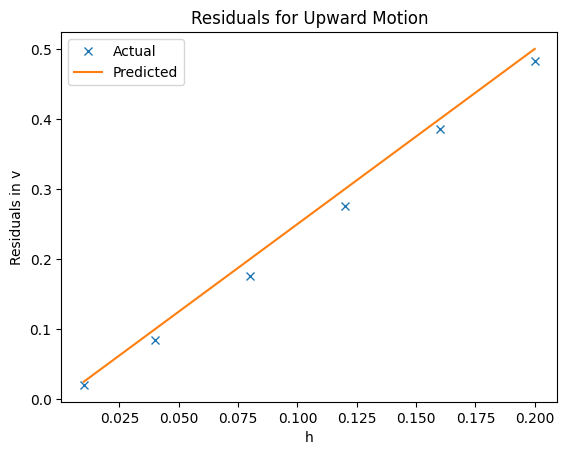

In [ ]:
error=h*c*(np.square(v0))/(2*m)

plt.subplot()
plt.plot(h, np.abs(residualArray ),"x",label='Actual')
plt.plot(h, np.abs(error),label="Predicted")
plt.title('Residuals for Upward Motion')
plt.ylabel('Residuals in v')
plt.xlabel('h')
plt.legend()
plt.show()

**In this cell, answer this question:**
Does the error still depend linearly on $h$?




## The Improved Euler Method

But we can do better!  Notice that, for each step in the Euler method, we caclulate the acceleration using the velocity from the *previous* data point.


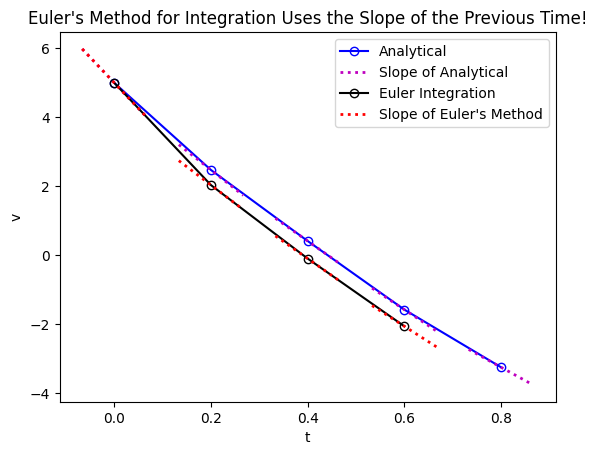

In [ ]:

j=4 # Plot points normally up to this one

h=.2
finalTime=4

time,va=analytical(v0,finalTime,step)
v=numerical(time,v0)

ax = plt.subplot()

ax.plot(time[:j+1],va[:j+1],'bo-', fillstyle="none",label="Analytical")

# We can use Newton's 2nd Law to calculate
# the acceleration at each velocity in our analytical solution,
# and each velocity in our numerical solution as well!
aa=accel(va)
a=accel(v)

# And a is the slope of the graph... it should be tangent to each point for the.

# Plot analytical slopes:
for i in range(j+1):
  if i==0: # Only want to do the label once; otherwise we get 3 copies in the legend.
    ax.plot([time[i]-h/3.,time[i]+h/3.],[va[i]-h/3.*aa[i],va[i]+h/3.*aa[i]],'m:',linewidth=2,label="Slope of Analytical")
  else:
    ax.plot([time[i]-h/3.,time[i]+h/3.],[va[i]-h/3.*aa[i],va[i]+h/3.*aa[i]],'m:',linewidth=2)


ax.plot(time[0:j],v[0:j],'o-', color="black",fillstyle='none',label='Euler Integration')
for i in range(1,j+1):
    if i==1: # Only want to do the label once; otherwise we get 3 copies in the legend.
      ax.plot([time[i-1]-h/3.,time[i-1]+h/3.],[v[i-1]-h/3.*a[i-1],v[i-1]+h/3.*a[i-1]],'r:',linewidth=2, label="Slope of Euler's Method")
    else:
      ax.plot([time[i-1]-h/3.,time[i-1]+h/3.],[v[i-1]-h/3.*a[i-1],v[i-1]+h/3.*a[i-1]],'r:',linewidth=2)


ax.legend()

ax.set_title("Euler's Method for Integration Uses the Slope of the Previous Time!")
ax.set_ylabel('v')
ax.set_xlabel('t')

plt.show()

Notice that the magnenta slope lines on the Analytical graph are tangent to the curve at each point, while the Euler integration slopes are tangent to the curve between the the point and the next point in time.

So it seems like we are calculating the slope of the segment a half-step early. It would be more accurate if we could calculate the slope halfway between two points in the Euler integration!  And this is the idea behind the Improved Euler Method.

Imagine if we could take the average of the acceleration at points $i$ and $i+1$, and use this to calaculate $v_{i+1}$:
\begin{eqnarray}
v_{i+1}=v_i+\frac{a_i+a_{i+1}}{2}h.
\end{eqnarray}
This is not exactly equal to $v$ at $t=t_i+\frac{h}{2},$ but it gets us close.

The difficulty, of course, is that we don't yet know $v_{i+1}$ so we can't calculate $a_{i+1}$.  Let's approximate $v_{i+1}=v_i+a(v_i) h $, just as we did with the basic Euler method.  Then
\begin{eqnarray}
v_{i+1}&=&v_i+\frac{a(v_i)+a(v_i+a(v_i)h)}{2}h
\end{eqnarray}
or, regrouping slightly,
\begin{eqnarray}
v_{i+1}&=& v_i + \frac{h}{2}\left(a(v_i)+a(v_i+a(v_i).\right)
\end{eqnarray}
We will give some names to these calculated values: $k_{1,i}=a(v_i)$ and $k_{2,i}=a(v_i+k_{1,i})$, so that
\begin{eqnarray}
v_{i+1}=v_i+\frac{h}{2}(k_{1,i}+k_{2,i}).
\end{eqnarray}
(This might feel rather finicky to be bothering with at this point, but it will be helpful to have these variables defined when we move on to more precise methods.)

**Implement this change in the code and find the residuals for various steps in h**.  The code below is the **unimproved** method for you to start with.


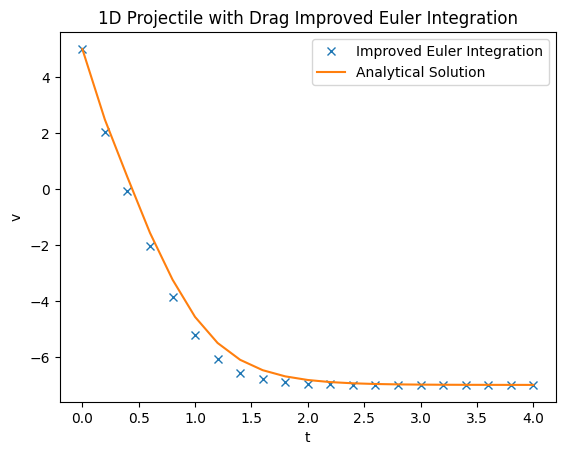

In [ ]:
def numericalImproved(time,v0):

# time=np.linspace(t0,tf,N) #(Just reuse old time)
  h=time[1]-time[0] # Stepsize

  v=np.zeros_like(time)

  v[0]=v0 # at t=0, let v=v0


  # Numerical Integration
  for i in range(1,time.size):
    v[i]=v[i-1]+accel(v[i-1])*h

  return v


v=numericalImproved(time,v0)

plt.subplot()
plt.plot(time, v,'x',label='Improved Euler Integration')
plt.plot(time, va,label='Analytical Solution')
plt.title('1D Projectile with Drag Improved Euler Integration')
plt.ylabel('v')
plt.xlabel('t')
plt.legend()
plt.show()
